In [2]:
import zipfile
with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [3]:
import os
import zipfile

path = 'c:\\Users\\YJKIM_PC\\pytorch_study\\sesac'

data = os.path.join(path, 'data')
train_data = os.path.join(data, 'train')
test_data = os.path.join(data, 'test1')

zip_file = zipfile.ZipFile(os.path.join(data,'train.zip'))
zip_file.extractall(path=data)
zip_file.close()

zip_file = zipfile.ZipFile(os.path.join(data,'test1.zip'))
zip_file.extractall(path=data)
zip_file.close()

In [4]:
train_files = os.listdir(train_data)
test_files = os.listdir(test_data)

print(len(train_files))
print(len(test_files))

25000
12500


In [5]:
train_files[0]

'cat.0.jpg'

In [6]:
test_files[0]

'1.jpg'

In [7]:
number_of_dogs = 0
number_of_cats = 0

for i in range(len(train_files)):
    if train_files[i].split('.')[0] == 'dog':
        number_of_dogs += 1
    else:
        number_of_cats += 1

print(number_of_dogs)
print(number_of_cats)

12500
12500


In [8]:
#이미지 분류 레이블을 만드는 방법
#방법 1은 폴더로 클래스를 나누는 방법: 폴더명을 레이블로 사용하는 방법
#방법 2는 csv 파일을 만든다. csv 파일의 컬럼 2개 (column 1: 파일명, column 2: 레이블)

#방법 1 사용
#연습시에는 데이터 4000장만 사용(고양이 2000장, 강아지 2000장)
#train: 1000장, 1000장, valid: 500장, 500장, test: 500장, 500장

In [9]:
sdata = 'sdata'
train_sdata = os.path.join(sdata, 'train')
valid_sdata = os.path.join(sdata, 'valid')
test_sdata = os.path.join(sdata, 'test')

os.makedirs(train_sdata, exist_ok=True)
os.makedirs(valid_sdata, exist_ok=True)
os.makedirs(test_sdata, exist_ok=True)

train_sdata_dog = os.path.join(train_sdata, 'dog')
train_sdata_cat = os.path.join(train_sdata, 'cat')
os.makedirs(train_sdata_dog, exist_ok=True)
os.makedirs(train_sdata_cat, exist_ok=True)

valid_sdata_dog = os.path.join(valid_sdata, 'dog')
valid_sdata_cat = os.path.join(valid_sdata, 'cat')
os.makedirs(valid_sdata_dog, exist_ok=True)
os.makedirs(valid_sdata_cat, exist_ok=True)

In [10]:
train_len_check = os.listdir(os.path.join(os.getcwd(), 'data\\train'))
test_len_check = os.listdir(os.path.join(os.getcwd(), 'data\\test1'))
print(len(train_len_check), len(test_len_check))

25000 12500


In [11]:
train_num = 1000
valid_num = 500

train_range = [0, train_num-1]
valid_range = [train_num, train_num + valid_num -1]

print(train_range)
print(valid_range)

[0, 999]
[1000, 1499]


In [12]:
import os
import shutil

# 데이터셋 디렉토리 경로 설정
dataset_dir = 'data/train'

# 새로운 train, valid, test 디렉토리 생성 경로
base_dir = 'sdata'

# 클래스 목록
classes = ['dog', 'cat']

# 폴더 경로 생성
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')

# 폴더 생성 함수
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# train, valid, test 폴더 및 각각의 클래스 폴더 생성
for cls in classes:
    create_dir(os.path.join(train_dir, cls))
    create_dir(os.path.join(valid_dir, cls))

# 이미지 복사 함수
def copy_images(start_idx, end_idx, src_dir, dst_dir, label):
    for i in range(start_idx, end_idx + 1):
        file_name = f'{label}.{i}.jpg'
        src_path = os.path.join(src_dir, file_name)
        dst_path = os.path.join(dst_dir, file_name)
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)

# 클래스별로 train, valid, test 데이터셋 구성
for cls in classes:
    # train dataset 구성 (0~9999)
    copy_images(train_range[0], train_range[1], dataset_dir, os.path.join(train_dir, cls), cls)

    # valid dataset 구성 (10000~12499)
    copy_images(valid_range[0], valid_range[1], dataset_dir, os.path.join(valid_dir, cls), cls)

print("데이터셋 분할 및 복사가 완료되었습니다.")

데이터셋 분할 및 복사가 완료되었습니다.


In [13]:
dataset_dir = 'data/test1'
test_dir = os.path.join(base_dir, 'test')

# 이미지 복사 함수
def copy_images(start_idx, end_idx, src_dir, dst_dir):
    for i in range(start_idx, end_idx + 1):
        file_name = f'{i}.jpg'
        src_path = os.path.join(src_dir, file_name)
        dst_path = os.path.join(dst_dir, file_name)
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)

# 클래스별로 train, valid, test 데이터셋 구성
copy_images(1, 12500, dataset_dir, test_dir)

print("데이터셋 분할 및 복사가 완료되었습니다.")

데이터셋 분할 및 복사가 완료되었습니다.


In [14]:
train_sdata_dog = os.listdir(os.path.join(train_sdata, 'dog'))
train_sdata_cat = os.listdir(os.path.join(train_sdata, 'cat'))

valid_sdata_dog = os.listdir(os.path.join(valid_sdata, 'dog'))
valid_sdata_cat = os.listdir(os.path.join(valid_sdata, 'cat'))

test_sdata = os.listdir(os.path.join(sdata, 'test'))

print(len(train_sdata_dog))
print(len(train_sdata_cat))
print(len(valid_sdata_dog))
print(len(valid_sdata_cat))
print(len(test_sdata))

1000
1000
500
500
12500


In [15]:
from torch.utils.data import Dataset
from PIL import Image
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, files, root_dir, mode, transform=None):
        self.files = files
        self.root_dir = root_dir
        self.mode = mode
        self.transform = transform

        # 레이블 생성 cat=0, dog=1
        if 'dog' in files[0]:
            self.label = 1
        else:
            self.label = 0

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.files[idx])
        img = Image.open(img_path)

        if self.transform:
            img = self.transform(img)

        if self.mode == 'train':
            return img, np.array([self.label])

        else:
            return img, self.files[idx]

In [16]:
from torchvision import transforms

org_size = (256,256)
img_size = 224

train_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(img_size),
    transforms.ToTensor(),
    #평균이 0.5, 표준편차 0.5 (0~1 사이의 실수)
    transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
])

test_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
])

In [17]:
#파일 목록, 파일 디렉터리, 모드, transform
train_dog_dataset = CustomDataset(train_sdata_dog, os.path.join(train_dir, 'dog'), 'train', transform=train_transform)
train_cat_dataset = CustomDataset(train_sdata_cat, os.path.join(train_dir, 'cat'), 'train', transform=train_transform)

valid_dog_dataset = CustomDataset(valid_sdata_dog, os.path.join(valid_dir, 'dog'), 'train', transform=test_transform)
valid_cat_dataset = CustomDataset(valid_sdata_cat, os.path.join(valid_dir, 'cat'), 'train', transform=test_transform)

# test_dog_dataset = CustomDataset(test_dog, os.path.join(test_dir), 'test', transform=test_transform)
# test_cat_dataset = CustomDataset(test_cat, os.path.join(test_dir), 'test', transform=test_transform)

In [18]:
from torch.utils.data import ConcatDataset

train_dataset = ConcatDataset([train_dog_dataset, train_cat_dataset])
valid_dataset = ConcatDataset([valid_dog_dataset, valid_cat_dataset])
#test_dataset = ConcatDataset([test_dog_dataset, test_cat_dataset])

In [19]:
from torch.utils.data import DataLoader

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
#test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.94509804].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9843137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8352941..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.92156863].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7490196..1.0].
Clipping input data to the valid rang

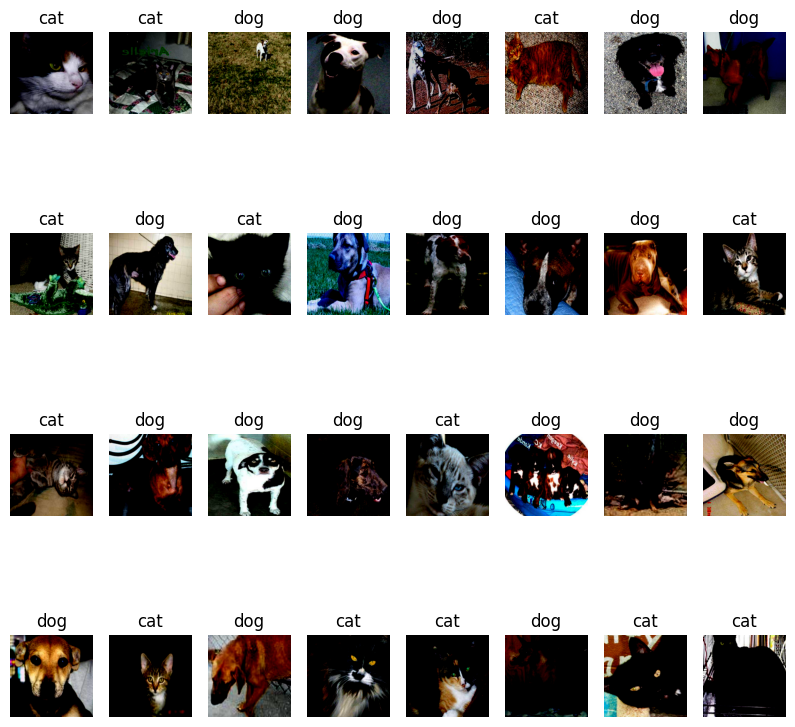

In [20]:
import matplotlib.pyplot as plt

img, label = next(iter(train_loader))
img.shape, label.shape

fig = plt.figure(figsize=(10,10))

classes = {0:'cat', 1:'dog'}

for i in range(32):
    #4행 8열
    ax = fig.add_subplot(4, 8, i+1)
    ax.set_title(classes[label[i].item()])
    ax.axis('off')
    #permute는 color 채널 순서를 재정렬
    ax.imshow(img[i].permute(1,2,0))

plt.show()

In [21]:
import torch
from torchvision.models import mobilenet_v3_large, MobileNet_V3_Large_Weights

#imageNet에 사전학습된 모델을 가져와서 학습(train)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = mobilenet_v3_large(weights=MobileNet_V3_Large_Weights).to(device)

c:\Users\YJKIM_PC\anaconda3\envs\pt\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
%pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [23]:
from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             432
       BatchNorm2d-2         [-1, 16, 112, 112]              32
         Hardswish-3         [-1, 16, 112, 112]               0
            Conv2d-4         [-1, 16, 112, 112]             144
       BatchNorm2d-5         [-1, 16, 112, 112]              32
              ReLU-6         [-1, 16, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             256
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 64, 112, 112]           1,024
      BatchNorm2d-11         [-1, 64, 112, 112]             128
             ReLU-12         [-1, 64, 112, 112]               0
           Conv2d-13           [-1, 64, 56, 56]             576
      BatchNorm2d-14           [-1, 64,

In [24]:
import torch.nn as nn
#특징 추출기는 그대로 사용하고, 분류기만 2개짜리로 변경
#fc -> 분류기, in_features -> 분류기의 입력
# model = resnet50(pretrained=True).to(device)
# num_features = model.fc.in_features
num_features = model.features[-1].out_channels
#이진 분류(binary classifier)
#최종 출력 노드의 개수: 1개(0.2, 0의 클래스일 확률이 더 높은 것)(0.5 기준)
#sigmoid()

#다중 분류(multi-label classifier)
#최종 출력 노드의 개수: 2개([0.8,0.2], [0.3,0.7])
#sofrmax()

#분류기는 2개로 변경
# resnet50 ver
# model.fc = torch.nn.Sequential(
#     torch.nn.Linear(num_features, 256),
#     torch.nn.ReLU(),
#     torch.nn.Dropout(0.5),
#     torch.nn.Linear(256, 1),
#     torch.nn.Sigmoid()
# ).to(device)

# mobilenetv3 ver
# 새로운 분류기 정의
class CustomClassifier(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(num_features, 1280),
            nn.Hardswish(),
            nn.Dropout(p=0.2),
            nn.Linear(1280, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        # 입력 텐서의 shape 출력
        print("Input shape to CustomClassifier:", x.shape)
        
        # Global average pooling (if necessary)
        if x.dim() > 2:
            x = nn.functional.adaptive_avg_pool2d(x, 1).squeeze(-1).squeeze(-1)
        
        x = x.view(x.size(0), -1)
        return self.classifier(x)

# 모델의 분류기를 새로운 분류기로 교체
model.classifier = CustomClassifier(num_features).to(device)

model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [25]:
import time
from tqdm import tqdm

def fit(model, criterion, optimizer, epochs, train_loader, valid_loader):
    #훈련 모드
    # model.train()

    train_loss = 0
    train_acc = 0
    train_correct = 0

    #그래프로 출력하기 위한 리스트
    train_losses = []
    train_accuracies = []
    valid_losses = []
    valid_accuracies = []

    for epoch in range(epochs):
        start = time.time()
        train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} [Train]')
        #1 epoch 중에 train에 해당하는 for문
        for train_x, train_y in train_pbar:
            model.train()
            train_x, train_y = train_x.to(device), train_y.to(device).float()
            optimizer.zero_grad()
            pred = model(train_x)
            loss = criterion(pred, train_y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            #활성화 함수 sigmoid를 쓰면
            y_pred = pred.cpu()
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
            #train_y와 y_pred이 같으면 correct 개수 추가
            train_correct += y_pred.eq(train_y.cpu()).int().sum()

            train_pbar.set_postfix({'loss': f'{loss.item():.4f}'})

        # validation data check
        valid_loss = 0
        valid_acc = 0
        valid_correct = 0

        #1 epoch 중에 valid에 해당하는 for문
        valid_pbar = tqdm(valid_loader, desc=f'Epoch {epoch+1}/{epochs} [Valid]')
        for valid_x, valid_y in valid_pbar:
            with torch.no_grad():
                model.eval()
                valid_x, valid_y = valid_x.to(device), valid_y.to(device).float()
                pred = model(valid_x)
                loss = criterion(pred, valid_y)
            valid_loss += loss.item()

            y_pred = pred.cpu()
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
            valid_correct += y_pred.eq(valid_y.cpu()).int().sum()

        train_acc = train_correct/len(train_loader.dataset)
        valid_acc = valid_correct/len(valid_loader.dataset)

        print(f'{time.time() - start:.3f}sec : [Epoch {epoch+1}/{epochs}] -> train loss: {train_loss/len(train_loader):.4f}, train acc: {train_acc*100:.3f}% / valid loss: {valid_loss/len(valid_loader):.4f}, valid acc: {valid_acc*100:.3f}%')

        train_losses.append(train_loss/len(train_loader))
        train_accuracies.append(train_acc)
        valid_losses.append(valid_loss/len(valid_loader))
        valid_accuracies.append(valid_acc)

        train_loss = 0
        train_acc = 0
        train_correct = 0

    plt.plot(train_losses, label='loss')
    plt.plot(train_accuracies, label='accuracy')
    plt.legend()
    plt.title('train loss and accuracy')
    plt.show()

    plt.plot(valid_losses, label='loss')
    plt.plot(valid_accuracies, label='accuracy')
    plt.legend()
    plt.title('valid loss and accuracy')
    plt.show()

Epoch 1/10 [Train]:   0%|          | 0/63 [00:00<?, ?it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:   3%|▎         | 2/63 [00:00<00:17,  3.58it/s, loss=0.6856]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:   6%|▋         | 4/63 [00:00<00:12,  4.89it/s, loss=0.6889]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  10%|▉         | 6/63 [00:01<00:10,  5.65it/s, loss=0.6782]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  13%|█▎        | 8/63 [00:01<00:09,  6.03it/s, loss=0.6841]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  16%|█▌        | 10/63 [00:01<00:09,  5.86it/s, loss=0.6800]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  19%|█▉        | 12/63 [00:02<00:08,  6.09it/s, loss=0.6835]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  22%|██▏       | 14/63 [00:02<00:07,  6.20it/s, loss=0.6873]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  25%|██▌       | 16/63 [00:02<00:07,  6.16it/s, loss=0.6760]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  29%|██▊       | 18/63 [00:03<00:07,  6.20it/s, loss=0.6774]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  30%|███       | 19/63 [00:03<00:07,  5.73it/s, loss=0.6696]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  33%|███▎      | 21/63 [00:03<00:07,  5.88it/s, loss=0.6703]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  37%|███▋      | 23/63 [00:04<00:06,  5.92it/s, loss=0.6688]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  40%|███▉      | 25/63 [00:04<00:06,  5.66it/s, loss=0.6642]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  43%|████▎     | 27/63 [00:04<00:06,  5.86it/s, loss=0.6712]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  46%|████▌     | 29/63 [00:05<00:05,  5.93it/s, loss=0.6790]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  49%|████▉     | 31/63 [00:05<00:05,  5.89it/s, loss=0.6627]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  52%|█████▏    | 33/63 [00:05<00:05,  5.84it/s, loss=0.6673]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  56%|█████▌    | 35/63 [00:06<00:04,  5.95it/s, loss=0.6559]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  59%|█████▊    | 37/63 [00:06<00:04,  5.78it/s, loss=0.6649]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  62%|██████▏   | 39/63 [00:06<00:04,  5.59it/s, loss=0.6533]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  63%|██████▎   | 40/63 [00:07<00:04,  5.36it/s, loss=0.6568]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  65%|██████▌   | 41/63 [00:07<00:04,  5.03it/s, loss=0.6570]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  68%|██████▊   | 43/63 [00:07<00:03,  5.44it/s, loss=0.6430]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  71%|███████▏  | 45/63 [00:07<00:03,  5.76it/s, loss=0.6434]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  75%|███████▍  | 47/63 [00:08<00:02,  5.72it/s, loss=0.6475]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  78%|███████▊  | 49/63 [00:08<00:02,  5.80it/s, loss=0.6362]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  81%|████████  | 51/63 [00:08<00:02,  5.99it/s, loss=0.6493]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  84%|████████▍ | 53/63 [00:09<00:01,  5.96it/s, loss=0.6392]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  87%|████████▋ | 55/63 [00:09<00:01,  5.98it/s, loss=0.6354]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  90%|█████████ | 57/63 [00:09<00:01,  5.92it/s, loss=0.6327]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  94%|█████████▎| 59/63 [00:10<00:00,  4.96it/s, loss=0.6348]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  95%|█████████▌| 60/63 [00:10<00:00,  4.72it/s, loss=0.6355]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Train]:  98%|█████████▊| 62/63 [00:11<00:00,  4.01it/s, loss=0.6428]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([16, 960])


Epoch 1/10 [Valid]:   3%|▎         | 1/32 [00:00<00:04,  6.89it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]:  12%|█▎        | 4/32 [00:00<00:04,  6.89it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]:  19%|█▉        | 6/32 [00:00<00:04,  6.43it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]:  25%|██▌       | 8/32 [00:01<00:03,  7.36it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]:  31%|███▏      | 10/32 [00:01<00:03,  6.73it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]:  34%|███▍      | 11/32 [00:01<00:03,  5.77it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]:  41%|████      | 13/32 [00:02<00:03,  5.97it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]:  50%|█████     | 16/32 [00:02<00:02,  6.49it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]:  56%|█████▋    | 18/32 [00:02<00:02,  6.72it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]:  62%|██████▎   | 20/32 [00:03<00:01,  6.91it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]:  69%|██████▉   | 22/32 [00:03<00:01,  6.43it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]:  75%|███████▌  | 24/32 [00:03<00:01,  6.72it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]:  81%|████████▏ | 26/32 [00:04<00:01,  5.72it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]:  88%|████████▊ | 28/32 [00:04<00:00,  6.15it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]:  91%|█████████ | 29/32 [00:04<00:00,  5.69it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]:  94%|█████████▍| 30/32 [00:04<00:00,  5.22it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 1/10 [Valid]: 100%|██████████| 32/32 [00:05<00:00,  6.18it/s]


Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([8, 960])
16.522sec : [Epoch 1/10] -> train loss: 0.6624, train acc: 78.450% / valid loss: 0.6031, valid acc: 95.700%


Epoch 2/10 [Train]:   2%|▏         | 1/63 [00:00<00:17,  3.49it/s, loss=0.6299]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:   3%|▎         | 2/63 [00:00<00:14,  4.11it/s, loss=0.6377]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:   5%|▍         | 3/63 [00:00<00:14,  4.27it/s, loss=0.6205]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:   8%|▊         | 5/63 [00:01<00:11,  4.91it/s, loss=0.6088]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  11%|█         | 7/63 [00:01<00:10,  5.26it/s, loss=0.6006]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  14%|█▍        | 9/63 [00:01<00:09,  5.44it/s, loss=0.5975]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  17%|█▋        | 11/63 [00:02<00:09,  5.22it/s, loss=0.6278]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  21%|██        | 13/63 [00:02<00:08,  5.59it/s, loss=0.6127]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  24%|██▍       | 15/63 [00:02<00:08,  5.35it/s, loss=0.6036]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  27%|██▋       | 17/63 [00:03<00:08,  5.73it/s, loss=0.5859]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  30%|███       | 19/63 [00:03<00:07,  5.73it/s, loss=0.6001]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  33%|███▎      | 21/63 [00:03<00:07,  5.93it/s, loss=0.5923]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  37%|███▋      | 23/63 [00:04<00:06,  6.32it/s, loss=0.5987]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  40%|███▉      | 25/63 [00:04<00:06,  5.96it/s, loss=0.5868]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  43%|████▎     | 27/63 [00:04<00:05,  6.25it/s, loss=0.6022]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  46%|████▌     | 29/63 [00:05<00:05,  6.00it/s, loss=0.5537]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  49%|████▉     | 31/63 [00:05<00:05,  6.39it/s, loss=0.5580]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  52%|█████▏    | 33/63 [00:05<00:04,  6.60it/s, loss=0.5735]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  56%|█████▌    | 35/63 [00:06<00:06,  4.55it/s, loss=0.5942]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  59%|█████▊    | 37/63 [00:06<00:04,  5.35it/s, loss=0.5712]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  62%|██████▏   | 39/63 [00:07<00:04,  5.70it/s, loss=0.5577]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  65%|██████▌   | 41/63 [00:07<00:03,  6.05it/s, loss=0.5471]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  68%|██████▊   | 43/63 [00:07<00:03,  5.98it/s, loss=0.5674]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  71%|███████▏  | 45/63 [00:08<00:03,  5.00it/s, loss=0.5257]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  75%|███████▍  | 47/63 [00:08<00:02,  5.56it/s, loss=0.5463]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  78%|███████▊  | 49/63 [00:08<00:02,  6.17it/s, loss=0.5065]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  81%|████████  | 51/63 [00:09<00:02,  5.65it/s, loss=0.5515]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  83%|████████▎ | 52/63 [00:09<00:03,  3.42it/s, loss=0.5268]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  84%|████████▍ | 53/63 [00:09<00:02,  3.74it/s, loss=0.5465]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  87%|████████▋ | 55/63 [00:10<00:01,  4.44it/s, loss=0.4939]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  89%|████████▉ | 56/63 [00:10<00:01,  4.29it/s, loss=0.5123]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  92%|█████████▏| 58/63 [00:10<00:01,  4.55it/s, loss=0.5084]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  95%|█████████▌| 60/63 [00:11<00:00,  5.15it/s, loss=0.5076]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]:  97%|█████████▋| 61/63 [00:11<00:00,  5.01it/s, loss=0.5184]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Train]: 100%|██████████| 63/63 [00:11<00:00,  5.39it/s, loss=0.5424]


Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([16, 960])


Epoch 2/10 [Valid]:   6%|▋         | 2/32 [00:00<00:03,  9.85it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Valid]:  12%|█▎        | 4/32 [00:00<00:03,  8.21it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Valid]:  16%|█▌        | 5/32 [00:00<00:04,  6.72it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Valid]:  25%|██▌       | 8/32 [00:01<00:04,  5.72it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Valid]:  31%|███▏      | 10/32 [00:01<00:03,  6.62it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Valid]:  38%|███▊      | 12/32 [00:01<00:02,  7.32it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Valid]:  44%|████▍     | 14/32 [00:02<00:02,  6.72it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Valid]:  50%|█████     | 16/32 [00:02<00:02,  7.14it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Valid]:  56%|█████▋    | 18/32 [00:02<00:01,  7.76it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Valid]:  62%|██████▎   | 20/32 [00:02<00:01,  8.28it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Valid]:  69%|██████▉   | 22/32 [00:03<00:01,  8.77it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Valid]:  75%|███████▌  | 24/32 [00:03<00:00,  8.74it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Valid]:  81%|████████▏ | 26/32 [00:03<00:00,  8.65it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Valid]:  88%|████████▊ | 28/32 [00:03<00:00,  8.67it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Valid]:  94%|█████████▍| 30/32 [00:03<00:00,  8.25it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 2/10 [Valid]: 100%|██████████| 32/32 [00:04<00:00,  7.75it/s]


Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([8, 960])
15.820sec : [Epoch 2/10] -> train loss: 0.5697, train acc: 90.000% / valid loss: 0.4435, valid acc: 95.800%


Epoch 3/10 [Train]:   0%|          | 0/63 [00:00<?, ?it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:   3%|▎         | 2/63 [00:00<00:12,  4.81it/s, loss=0.4739]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:   5%|▍         | 3/63 [00:00<00:12,  4.68it/s, loss=0.5135]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:   8%|▊         | 5/63 [00:00<00:10,  5.48it/s, loss=0.4635]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  11%|█         | 7/63 [00:01<00:09,  6.02it/s, loss=0.4814]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  14%|█▍        | 9/63 [00:01<00:08,  6.21it/s, loss=0.4901]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  17%|█▋        | 11/63 [00:01<00:08,  6.35it/s, loss=0.4653]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  21%|██        | 13/63 [00:02<00:07,  6.55it/s, loss=0.4231]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  24%|██▍       | 15/63 [00:02<00:07,  6.23it/s, loss=0.4294]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  27%|██▋       | 17/63 [00:02<00:07,  6.44it/s, loss=0.4589]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  30%|███       | 19/63 [00:03<00:06,  6.35it/s, loss=0.4232]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  33%|███▎      | 21/63 [00:03<00:06,  6.46it/s, loss=0.3980]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  37%|███▋      | 23/63 [00:03<00:06,  5.96it/s, loss=0.4327]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  40%|███▉      | 25/63 [00:04<00:05,  6.40it/s, loss=0.4110]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  43%|████▎     | 27/63 [00:04<00:05,  6.40it/s, loss=0.4233]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  46%|████▌     | 29/63 [00:04<00:05,  6.64it/s, loss=0.4163]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  49%|████▉     | 31/63 [00:04<00:04,  6.74it/s, loss=0.3840]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  52%|█████▏    | 33/63 [00:05<00:04,  6.37it/s, loss=0.4097]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  56%|█████▌    | 35/63 [00:05<00:04,  6.22it/s, loss=0.4275]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  59%|█████▊    | 37/63 [00:05<00:03,  6.51it/s, loss=0.3816]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  62%|██████▏   | 39/63 [00:06<00:03,  6.60it/s, loss=0.3731]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  65%|██████▌   | 41/63 [00:06<00:03,  6.40it/s, loss=0.3886]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  68%|██████▊   | 43/63 [00:06<00:03,  6.25it/s, loss=0.4107]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  71%|███████▏  | 45/63 [00:07<00:02,  6.58it/s, loss=0.4065]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  75%|███████▍  | 47/63 [00:07<00:02,  6.41it/s, loss=0.3388]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  78%|███████▊  | 49/63 [00:07<00:02,  6.14it/s, loss=0.3478]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  81%|████████  | 51/63 [00:08<00:01,  6.56it/s, loss=0.3571]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  84%|████████▍ | 53/63 [00:08<00:01,  6.71it/s, loss=0.4157]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  87%|████████▋ | 55/63 [00:08<00:01,  6.63it/s, loss=0.3588]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  90%|█████████ | 57/63 [00:09<00:00,  6.37it/s, loss=0.3757]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  94%|█████████▎| 59/63 [00:09<00:00,  6.30it/s, loss=0.2775]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]:  97%|█████████▋| 61/63 [00:09<00:00,  6.19it/s, loss=0.2937]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Train]: 100%|██████████| 63/63 [00:09<00:00,  6.31it/s, loss=0.4916]


Input shape to CustomClassifier: torch.Size([16, 960])


Epoch 3/10 [Valid]:   0%|          | 0/32 [00:00<?, ?it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Valid]:   6%|▋         | 2/32 [00:00<00:03,  7.92it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Valid]:   9%|▉         | 3/32 [00:00<00:03,  8.45it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Valid]:  16%|█▌        | 5/32 [00:00<00:02,  9.07it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Valid]:  25%|██▌       | 8/32 [00:00<00:02,  8.98it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Valid]:  28%|██▊       | 9/32 [00:01<00:02,  9.17it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Valid]:  41%|████      | 13/32 [00:01<00:02,  8.75it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Valid]:  47%|████▋     | 15/32 [00:01<00:02,  8.30it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Valid]:  53%|█████▎    | 17/32 [00:01<00:01,  8.14it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Valid]:  59%|█████▉    | 19/32 [00:02<00:01,  8.56it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Valid]:  66%|██████▌   | 21/32 [00:02<00:01,  8.56it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Valid]:  72%|███████▏  | 23/32 [00:02<00:01,  8.63it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Valid]:  78%|███████▊  | 25/32 [00:02<00:00,  8.30it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Valid]:  84%|████████▍ | 27/32 [00:03<00:00,  7.90it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Valid]:  91%|█████████ | 29/32 [00:03<00:00,  8.52it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 3/10 [Valid]: 100%|██████████| 32/32 [00:03<00:00,  8.77it/s]


Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([8, 960])
13.642sec : [Epoch 3/10] -> train loss: 0.4117, train acc: 94.700% / valid loss: 0.2661, valid acc: 96.200%


Epoch 4/10 [Train]:   2%|▏         | 1/63 [00:00<00:11,  5.21it/s, loss=0.3382]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:   3%|▎         | 2/63 [00:00<00:12,  4.72it/s, loss=0.3249]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:   5%|▍         | 3/63 [00:00<00:12,  4.75it/s, loss=0.3092]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:   8%|▊         | 5/63 [00:00<00:11,  5.21it/s, loss=0.3113]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  11%|█         | 7/63 [00:01<00:10,  5.52it/s, loss=0.2967]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  14%|█▍        | 9/63 [00:01<00:09,  5.47it/s, loss=0.3455]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  17%|█▋        | 11/63 [00:02<00:08,  6.01it/s, loss=0.2751]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  21%|██        | 13/63 [00:02<00:08,  5.90it/s, loss=0.2690]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  24%|██▍       | 15/63 [00:02<00:07,  6.41it/s, loss=0.2951]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  27%|██▋       | 17/63 [00:03<00:08,  5.41it/s, loss=0.2490]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  30%|███       | 19/63 [00:03<00:07,  6.00it/s, loss=0.3411]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  33%|███▎      | 21/63 [00:03<00:06,  6.32it/s, loss=0.2522]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  37%|███▋      | 23/63 [00:03<00:06,  6.05it/s, loss=0.2623]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  40%|███▉      | 25/63 [00:04<00:06,  5.97it/s, loss=0.2583]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  43%|████▎     | 27/63 [00:04<00:05,  6.08it/s, loss=0.2316]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  46%|████▌     | 29/63 [00:04<00:05,  5.76it/s, loss=0.2113]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  49%|████▉     | 31/63 [00:05<00:05,  5.94it/s, loss=0.2675]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  52%|█████▏    | 33/63 [00:05<00:05,  5.54it/s, loss=0.2485]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  56%|█████▌    | 35/63 [00:05<00:04,  6.02it/s, loss=0.2445]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  59%|█████▊    | 37/63 [00:06<00:04,  6.27it/s, loss=0.2540]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  62%|██████▏   | 39/63 [00:06<00:03,  6.47it/s, loss=0.2136]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  65%|██████▌   | 41/63 [00:06<00:03,  6.24it/s, loss=0.3357]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  68%|██████▊   | 43/63 [00:07<00:03,  6.60it/s, loss=0.3370]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  71%|███████▏  | 45/63 [00:07<00:02,  6.38it/s, loss=0.2179]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  75%|███████▍  | 47/63 [00:07<00:02,  6.08it/s, loss=0.2185]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  78%|███████▊  | 49/63 [00:08<00:02,  6.34it/s, loss=0.2180]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  81%|████████  | 51/63 [00:08<00:01,  6.14it/s, loss=0.2084]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  84%|████████▍ | 53/63 [00:08<00:01,  5.75it/s, loss=0.2043]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  87%|████████▋ | 55/63 [00:09<00:01,  6.26it/s, loss=0.1514]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  90%|█████████ | 57/63 [00:09<00:00,  6.45it/s, loss=0.2611]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  94%|█████████▎| 59/63 [00:09<00:00,  6.74it/s, loss=0.1937]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]:  97%|█████████▋| 61/63 [00:10<00:00,  6.89it/s, loss=0.3073]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Train]: 100%|██████████| 63/63 [00:10<00:00,  6.12it/s, loss=0.2462]


Input shape to CustomClassifier: torch.Size([16, 960])


Epoch 4/10 [Valid]:   0%|          | 0/32 [00:00<?, ?it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:   6%|▋         | 2/32 [00:00<00:04,  7.26it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:   9%|▉         | 3/32 [00:00<00:03,  7.81it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:  12%|█▎        | 4/32 [00:00<00:03,  8.30it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:  16%|█▌        | 5/32 [00:00<00:03,  8.68it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:  25%|██▌       | 8/32 [00:00<00:02,  9.04it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:  31%|███▏      | 10/32 [00:01<00:02,  9.03it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:  38%|███▊      | 12/32 [00:01<00:02,  9.21it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:  44%|████▍     | 14/32 [00:01<00:01,  9.02it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:  50%|█████     | 16/32 [00:01<00:01,  9.13it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:  56%|█████▋    | 18/32 [00:02<00:01,  8.53it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:  62%|██████▎   | 20/32 [00:02<00:01,  8.55it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:  69%|██████▉   | 22/32 [00:02<00:01,  7.42it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:  75%|███████▌  | 24/32 [00:02<00:01,  7.88it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:  81%|████████▏ | 26/32 [00:03<00:00,  8.30it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:  88%|████████▊ | 28/32 [00:03<00:00,  7.39it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]:  94%|█████████▍| 30/32 [00:03<00:00,  7.84it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 4/10 [Valid]: 100%|██████████| 32/32 [00:03<00:00,  8.47it/s]


Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([8, 960])
14.080sec : [Epoch 4/10] -> train loss: 0.2637, train acc: 95.200% / valid loss: 0.1618, valid acc: 96.400%


Epoch 5/10 [Train]:   2%|▏         | 1/63 [00:00<00:15,  4.05it/s, loss=0.2568]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:   3%|▎         | 2/63 [00:00<00:14,  4.27it/s, loss=0.2064]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:   6%|▋         | 4/63 [00:00<00:11,  5.00it/s, loss=0.1307]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:   8%|▊         | 5/63 [00:01<00:11,  5.03it/s, loss=0.1927]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  11%|█         | 7/63 [00:01<00:10,  5.48it/s, loss=0.1879]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  14%|█▍        | 9/63 [00:01<00:09,  5.46it/s, loss=0.1568]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  16%|█▌        | 10/63 [00:01<00:10,  4.99it/s, loss=0.1717]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  19%|█▉        | 12/63 [00:02<00:10,  5.07it/s, loss=0.2021]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  22%|██▏       | 14/63 [00:02<00:11,  4.25it/s, loss=0.1503]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  25%|██▌       | 16/63 [00:03<00:09,  4.87it/s, loss=0.2457]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  27%|██▋       | 17/63 [00:03<00:10,  4.40it/s, loss=0.1740]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  29%|██▊       | 18/63 [00:03<00:12,  3.58it/s, loss=0.2068]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  30%|███       | 19/63 [00:04<00:12,  3.42it/s, loss=0.1567]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  33%|███▎      | 21/63 [00:04<00:10,  3.84it/s, loss=0.1749]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  37%|███▋      | 23/63 [00:05<00:08,  4.67it/s, loss=0.1618]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  40%|███▉      | 25/63 [00:05<00:07,  5.43it/s, loss=0.1621]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  43%|████▎     | 27/63 [00:05<00:06,  5.46it/s, loss=0.1268]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  46%|████▌     | 29/63 [00:06<00:06,  5.24it/s, loss=0.2753]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  48%|████▊     | 30/63 [00:06<00:07,  4.25it/s, loss=0.1273]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  49%|████▉     | 31/63 [00:06<00:07,  4.10it/s, loss=0.1700]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  51%|█████     | 32/63 [00:06<00:08,  3.85it/s, loss=0.1382]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  54%|█████▍    | 34/63 [00:07<00:06,  4.41it/s, loss=0.1303]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  57%|█████▋    | 36/63 [00:07<00:06,  4.37it/s, loss=0.2209]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  60%|██████    | 38/63 [00:08<00:04,  5.11it/s, loss=0.1499]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  62%|██████▏   | 39/63 [00:08<00:05,  4.69it/s, loss=0.1433]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  63%|██████▎   | 40/63 [00:08<00:05,  4.50it/s, loss=0.2404]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  67%|██████▋   | 42/63 [00:09<00:04,  4.37it/s, loss=0.1462]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  68%|██████▊   | 43/63 [00:09<00:04,  4.35it/s, loss=0.1254]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  71%|███████▏  | 45/63 [00:09<00:03,  4.79it/s, loss=0.2460]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  73%|███████▎  | 46/63 [00:10<00:04,  4.02it/s, loss=0.1646]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  75%|███████▍  | 47/63 [00:10<00:04,  3.65it/s, loss=0.1938]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  78%|███████▊  | 49/63 [00:10<00:03,  3.75it/s, loss=0.1510]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  79%|███████▉  | 50/63 [00:11<00:04,  3.12it/s, loss=0.1039]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  81%|████████  | 51/63 [00:11<00:03,  3.32it/s, loss=0.2153]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  83%|████████▎ | 52/63 [00:11<00:02,  3.68it/s, loss=0.1277]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  84%|████████▍ | 53/63 [00:12<00:02,  3.44it/s, loss=0.1223]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  86%|████████▌ | 54/63 [00:12<00:02,  3.68it/s, loss=0.1228]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  89%|████████▉ | 56/63 [00:12<00:01,  4.22it/s, loss=0.1155]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  90%|█████████ | 57/63 [00:12<00:01,  4.37it/s, loss=0.1042]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  94%|█████████▎| 59/63 [00:13<00:00,  4.98it/s, loss=0.1500]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]:  97%|█████████▋| 61/63 [00:13<00:00,  4.78it/s, loss=0.2628]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Train]: 100%|██████████| 63/63 [00:14<00:00,  4.49it/s, loss=0.2973]


Input shape to CustomClassifier: torch.Size([16, 960])


Epoch 5/10 [Valid]:   3%|▎         | 1/32 [00:00<00:03,  8.47it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:   6%|▋         | 2/32 [00:00<00:04,  7.24it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  12%|█▎        | 4/32 [00:00<00:04,  6.82it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  19%|█▉        | 6/32 [00:00<00:03,  6.80it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  22%|██▏       | 7/32 [00:01<00:03,  6.69it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  25%|██▌       | 8/32 [00:01<00:04,  5.77it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  28%|██▊       | 9/32 [00:01<00:05,  4.28it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  38%|███▊      | 12/32 [00:02<00:03,  5.34it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  41%|████      | 13/32 [00:02<00:04,  4.08it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  47%|████▋     | 15/32 [00:03<00:04,  3.78it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  53%|█████▎    | 17/32 [00:03<00:03,  4.78it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  56%|█████▋    | 18/32 [00:03<00:02,  4.68it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  62%|██████▎   | 20/32 [00:04<00:02,  4.20it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  66%|██████▌   | 21/32 [00:04<00:02,  3.77it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  72%|███████▏  | 23/32 [00:05<00:02,  3.92it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  78%|███████▊  | 25/32 [00:05<00:01,  4.53it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  81%|████████▏ | 26/32 [00:05<00:01,  4.07it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  84%|████████▍ | 27/32 [00:05<00:01,  4.10it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  91%|█████████ | 29/32 [00:06<00:00,  4.65it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]:  94%|█████████▍| 30/32 [00:06<00:00,  4.47it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 5/10 [Valid]: 100%|██████████| 32/32 [00:06<00:00,  4.61it/s]


Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([8, 960])
20.995sec : [Epoch 5/10] -> train loss: 0.1762, train acc: 96.100% / valid loss: 0.1151, valid acc: 96.700%


Epoch 6/10 [Train]:   2%|▏         | 1/63 [00:00<00:16,  3.83it/s, loss=0.1182]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:   3%|▎         | 2/63 [00:00<00:13,  4.42it/s, loss=0.1041]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:   5%|▍         | 3/63 [00:00<00:12,  4.65it/s, loss=0.1425]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:   8%|▊         | 5/63 [00:01<00:10,  5.32it/s, loss=0.0984]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  10%|▉         | 6/63 [00:01<00:11,  5.04it/s, loss=0.1036]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  13%|█▎        | 8/63 [00:01<00:11,  4.92it/s, loss=0.0826]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  16%|█▌        | 10/63 [00:01<00:09,  5.58it/s, loss=0.1327]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  17%|█▋        | 11/63 [00:02<00:09,  5.21it/s, loss=0.1136]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  21%|██        | 13/63 [00:02<00:08,  5.90it/s, loss=0.1008]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  24%|██▍       | 15/63 [00:02<00:07,  6.07it/s, loss=0.0963]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  25%|██▌       | 16/63 [00:03<00:08,  5.29it/s, loss=0.1052]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  29%|██▊       | 18/63 [00:03<00:07,  6.04it/s, loss=0.1539]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  32%|███▏      | 20/63 [00:03<00:07,  6.04it/s, loss=0.1376]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  35%|███▍      | 22/63 [00:04<00:06,  5.99it/s, loss=0.1583]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  38%|███▊      | 24/63 [00:04<00:06,  5.81it/s, loss=0.0978]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  41%|████▏     | 26/63 [00:04<00:06,  5.64it/s, loss=0.0587]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  44%|████▍     | 28/63 [00:05<00:05,  5.94it/s, loss=0.0693]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  48%|████▊     | 30/63 [00:05<00:05,  5.83it/s, loss=0.0650]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  51%|█████     | 32/63 [00:05<00:06,  5.09it/s, loss=0.0939]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  54%|█████▍    | 34/63 [00:06<00:05,  5.26it/s, loss=0.1926]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  57%|█████▋    | 36/63 [00:06<00:04,  5.68it/s, loss=0.1666]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  60%|██████    | 38/63 [00:06<00:03,  6.32it/s, loss=0.1252]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  63%|██████▎   | 40/63 [00:07<00:04,  5.24it/s, loss=0.0518]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  67%|██████▋   | 42/63 [00:07<00:04,  5.15it/s, loss=0.0866]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  70%|██████▉   | 44/63 [00:07<00:03,  5.30it/s, loss=0.1071]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  71%|███████▏  | 45/63 [00:08<00:04,  3.84it/s, loss=0.1283]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  73%|███████▎  | 46/63 [00:08<00:04,  3.50it/s, loss=0.1078]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  76%|███████▌  | 48/63 [00:09<00:03,  4.40it/s, loss=0.0959]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  79%|███████▉  | 50/63 [00:09<00:02,  4.89it/s, loss=0.0861]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  81%|████████  | 51/63 [00:09<00:02,  4.51it/s, loss=0.0762]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  83%|████████▎ | 52/63 [00:09<00:02,  4.44it/s, loss=0.1454]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  84%|████████▍ | 53/63 [00:10<00:02,  4.17it/s, loss=0.1335]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  87%|████████▋ | 55/63 [00:10<00:01,  4.85it/s, loss=0.0807]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  90%|█████████ | 57/63 [00:10<00:01,  5.73it/s, loss=0.0807]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  94%|█████████▎| 59/63 [00:11<00:00,  5.57it/s, loss=0.0917]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]:  97%|█████████▋| 61/63 [00:11<00:00,  5.78it/s, loss=0.0518]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Train]: 100%|██████████| 63/63 [00:11<00:00,  5.33it/s, loss=0.1696]


Input shape to CustomClassifier: torch.Size([16, 960])


Epoch 6/10 [Valid]:   3%|▎         | 1/32 [00:00<00:03,  9.05it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:   9%|▉         | 3/32 [00:00<00:05,  5.26it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  16%|█▌        | 5/32 [00:00<00:04,  5.54it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  22%|██▏       | 7/32 [00:01<00:04,  5.36it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  25%|██▌       | 8/32 [00:01<00:04,  5.90it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  31%|███▏      | 10/32 [00:01<00:03,  5.62it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  34%|███▍      | 11/32 [00:02<00:04,  5.04it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  41%|████      | 13/32 [00:02<00:03,  5.35it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  47%|████▋     | 15/32 [00:02<00:03,  5.07it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  53%|█████▎    | 17/32 [00:03<00:02,  5.77it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  56%|█████▋    | 18/32 [00:03<00:02,  6.08it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  59%|█████▉    | 19/32 [00:03<00:02,  5.39it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  66%|██████▌   | 21/32 [00:03<00:02,  5.21it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  72%|███████▏  | 23/32 [00:04<00:01,  5.47it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  78%|███████▊  | 25/32 [00:04<00:01,  6.57it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  84%|████████▍ | 27/32 [00:04<00:00,  5.68it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  91%|█████████ | 29/32 [00:05<00:00,  6.13it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]:  97%|█████████▋| 31/32 [00:05<00:00,  5.93it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 6/10 [Valid]: 100%|██████████| 32/32 [00:05<00:00,  5.62it/s]


Input shape to CustomClassifier: torch.Size([8, 960])
17.504sec : [Epoch 6/10] -> train loss: 0.1136, train acc: 97.300% / valid loss: 0.0918, valid acc: 97.300%


Epoch 7/10 [Train]:   0%|          | 0/63 [00:00<?, ?it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:   3%|▎         | 2/63 [00:00<00:13,  4.54it/s, loss=0.1832]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:   5%|▍         | 3/63 [00:00<00:14,  4.20it/s, loss=0.0984]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:   8%|▊         | 5/63 [00:01<00:12,  4.63it/s, loss=0.1111]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  10%|▉         | 6/63 [00:01<00:12,  4.72it/s, loss=0.1167]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  13%|█▎        | 8/63 [00:01<00:10,  5.20it/s, loss=0.0983]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  16%|█▌        | 10/63 [00:02<00:09,  5.54it/s, loss=0.1279]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  19%|█▉        | 12/63 [00:02<00:09,  5.54it/s, loss=0.0839]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  22%|██▏       | 14/63 [00:02<00:08,  5.76it/s, loss=0.0491]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  25%|██▌       | 16/63 [00:02<00:07,  6.32it/s, loss=0.0867]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  27%|██▋       | 17/63 [00:03<00:09,  4.74it/s, loss=0.1415]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  30%|███       | 19/63 [00:03<00:08,  5.28it/s, loss=0.0649]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  32%|███▏      | 20/63 [00:04<00:10,  4.22it/s, loss=0.0559]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  35%|███▍      | 22/63 [00:04<00:08,  4.70it/s, loss=0.0924]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  38%|███▊      | 24/63 [00:04<00:07,  5.33it/s, loss=0.0521]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  41%|████▏     | 26/63 [00:04<00:06,  6.13it/s, loss=0.0485]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  44%|████▍     | 28/63 [00:05<00:05,  6.45it/s, loss=0.0978]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  48%|████▊     | 30/63 [00:05<00:05,  6.44it/s, loss=0.0911]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  51%|█████     | 32/63 [00:05<00:05,  5.96it/s, loss=0.0515]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  54%|█████▍    | 34/63 [00:06<00:06,  4.61it/s, loss=0.0980]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  57%|█████▋    | 36/63 [00:06<00:05,  5.27it/s, loss=0.1564]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  60%|██████    | 38/63 [00:07<00:04,  5.02it/s, loss=0.0751]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  62%|██████▏   | 39/63 [00:07<00:04,  4.98it/s, loss=0.1332]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  65%|██████▌   | 41/63 [00:07<00:03,  5.59it/s, loss=0.0824]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  68%|██████▊   | 43/63 [00:08<00:03,  5.75it/s, loss=0.0580]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  70%|██████▉   | 44/63 [00:08<00:03,  5.15it/s, loss=0.0425]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  73%|███████▎  | 46/63 [00:08<00:03,  5.52it/s, loss=0.0486]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  76%|███████▌  | 48/63 [00:09<00:02,  5.89it/s, loss=0.0698]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  79%|███████▉  | 50/63 [00:09<00:02,  6.47it/s, loss=0.0337]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  83%|████████▎ | 52/63 [00:09<00:01,  6.72it/s, loss=0.1385]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  86%|████████▌ | 54/63 [00:09<00:01,  6.48it/s, loss=0.0744]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  87%|████████▋ | 55/63 [00:10<00:01,  5.89it/s, loss=0.0832]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  90%|█████████ | 57/63 [00:10<00:00,  6.03it/s, loss=0.0758]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  94%|█████████▎| 59/63 [00:10<00:00,  6.01it/s, loss=0.0843]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]:  97%|█████████▋| 61/63 [00:11<00:00,  6.15it/s, loss=0.0753]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Train]: 100%|██████████| 63/63 [00:11<00:00,  5.59it/s, loss=0.0613]


Input shape to CustomClassifier: torch.Size([16, 960])


Epoch 7/10 [Valid]:   0%|          | 0/32 [00:00<?, ?it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Valid]:   6%|▋         | 2/32 [00:00<00:03,  9.90it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Valid]:  16%|█▌        | 5/32 [00:00<00:02,  9.27it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Valid]:  22%|██▏       | 7/32 [00:00<00:02,  9.34it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Valid]:  25%|██▌       | 8/32 [00:00<00:02,  9.26it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Valid]:  34%|███▍      | 11/32 [00:01<00:02,  8.37it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Valid]:  41%|████      | 13/32 [00:01<00:02,  8.72it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Valid]:  47%|████▋     | 15/32 [00:01<00:02,  8.30it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Valid]:  53%|█████▎    | 17/32 [00:01<00:01,  8.62it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Valid]:  59%|█████▉    | 19/32 [00:02<00:01,  9.04it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Valid]:  69%|██████▉   | 22/32 [00:02<00:01,  9.02it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Valid]:  75%|███████▌  | 24/32 [00:02<00:00,  8.86it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Valid]:  81%|████████▏ | 26/32 [00:02<00:00,  8.77it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Valid]:  88%|████████▊ | 28/32 [00:03<00:00,  8.70it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Valid]:  94%|█████████▍| 30/32 [00:03<00:00,  8.41it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 7/10 [Valid]: 100%|██████████| 32/32 [00:03<00:00,  8.96it/s]


Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([8, 960])
14.854sec : [Epoch 7/10] -> train loss: 0.0924, train acc: 97.150% / valid loss: 0.0799, valid acc: 97.300%


Epoch 8/10 [Train]:   0%|          | 0/63 [00:00<?, ?it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:   2%|▏         | 1/63 [00:00<00:11,  5.49it/s, loss=0.0722]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:   5%|▍         | 3/63 [00:00<00:11,  5.44it/s, loss=0.0640]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:   8%|▊         | 5/63 [00:00<00:09,  6.00it/s, loss=0.0447]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  11%|█         | 7/63 [00:01<00:08,  6.31it/s, loss=0.0959]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  14%|█▍        | 9/63 [00:01<00:08,  6.32it/s, loss=0.0358]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  17%|█▋        | 11/63 [00:01<00:07,  6.56it/s, loss=0.0266]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  21%|██        | 13/63 [00:02<00:07,  6.39it/s, loss=0.0346]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  24%|██▍       | 15/63 [00:02<00:07,  6.58it/s, loss=0.0308]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  27%|██▋       | 17/63 [00:02<00:06,  6.61it/s, loss=0.0647]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  30%|███       | 19/63 [00:03<00:06,  6.52it/s, loss=0.0371]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  33%|███▎      | 21/63 [00:03<00:07,  5.94it/s, loss=0.0472]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  37%|███▋      | 23/63 [00:03<00:06,  6.44it/s, loss=0.1138]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  40%|███▉      | 25/63 [00:04<00:05,  6.54it/s, loss=0.0198]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  43%|████▎     | 27/63 [00:04<00:05,  6.31it/s, loss=0.0552]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  46%|████▌     | 29/63 [00:04<00:05,  6.44it/s, loss=0.0580]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  49%|████▉     | 31/63 [00:04<00:05,  6.28it/s, loss=0.0370]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  52%|█████▏    | 33/63 [00:05<00:04,  6.52it/s, loss=0.0207]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  56%|█████▌    | 35/63 [00:05<00:04,  6.42it/s, loss=0.0795]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  59%|█████▊    | 37/63 [00:05<00:04,  6.10it/s, loss=0.0959]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  60%|██████    | 38/63 [00:06<00:04,  5.53it/s, loss=0.0917]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  63%|██████▎   | 40/63 [00:06<00:03,  6.01it/s, loss=0.0366]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  67%|██████▋   | 42/63 [00:06<00:03,  6.27it/s, loss=0.1763]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  70%|██████▉   | 44/63 [00:07<00:02,  6.58it/s, loss=0.0398]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  73%|███████▎  | 46/63 [00:07<00:02,  6.34it/s, loss=0.0503]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  76%|███████▌  | 48/63 [00:07<00:02,  6.60it/s, loss=0.0993]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  79%|███████▉  | 50/63 [00:07<00:01,  6.63it/s, loss=0.0198]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  83%|████████▎ | 52/63 [00:08<00:01,  6.38it/s, loss=0.0669]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  86%|████████▌ | 54/63 [00:08<00:01,  6.33it/s, loss=0.0429]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  89%|████████▉ | 56/63 [00:09<00:01,  5.31it/s, loss=0.0630]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  92%|█████████▏| 58/63 [00:09<00:00,  5.19it/s, loss=0.0598]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]:  95%|█████████▌| 60/63 [00:09<00:00,  5.83it/s, loss=0.0269]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Train]: 100%|██████████| 63/63 [00:10<00:00,  6.26it/s, loss=0.1793]


Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([16, 960])


Epoch 8/10 [Valid]:   6%|▋         | 2/32 [00:00<00:03,  7.60it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Valid]:  12%|█▎        | 4/32 [00:00<00:03,  8.72it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Valid]:  19%|█▉        | 6/32 [00:00<00:03,  8.50it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Valid]:  25%|██▌       | 8/32 [00:01<00:03,  7.43it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Valid]:  28%|██▊       | 9/32 [00:01<00:02,  7.96it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Valid]:  38%|███▊      | 12/32 [00:01<00:02,  7.87it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Valid]:  44%|████▍     | 14/32 [00:01<00:02,  8.21it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Valid]:  50%|█████     | 16/32 [00:02<00:02,  7.38it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Valid]:  53%|█████▎    | 17/32 [00:02<00:02,  6.54it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Valid]:  62%|██████▎   | 20/32 [00:02<00:01,  7.28it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Valid]:  69%|██████▉   | 22/32 [00:02<00:01,  7.81it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Valid]:  78%|███████▊  | 25/32 [00:03<00:00,  8.27it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Valid]:  81%|████████▏ | 26/32 [00:03<00:00,  8.07it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Valid]:  91%|█████████ | 29/32 [00:03<00:00,  8.64it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 8/10 [Valid]: 100%|██████████| 32/32 [00:03<00:00,  8.08it/s]


Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([8, 960])
14.033sec : [Epoch 8/10] -> train loss: 0.0703, train acc: 97.950% / valid loss: 0.0727, valid acc: 97.400%


Epoch 9/10 [Train]:   0%|          | 0/63 [00:00<?, ?it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:   2%|▏         | 1/63 [00:00<00:09,  6.45it/s, loss=0.1801]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:   3%|▎         | 2/63 [00:00<00:09,  6.43it/s, loss=0.0793]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:   5%|▍         | 3/63 [00:00<00:09,  6.19it/s, loss=0.0340]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:   6%|▋         | 4/63 [00:00<00:09,  5.98it/s, loss=0.0496]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:   8%|▊         | 5/63 [00:00<00:09,  5.94it/s, loss=0.0608]

Input shape to CustomClassifier:

Epoch 9/10 [Train]:  10%|▉         | 6/63 [00:01<00:09,  5.73it/s, loss=0.0411]

 torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  13%|█▎        | 8/63 [00:01<00:09,  6.04it/s, loss=0.0587]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  14%|█▍        | 9/63 [00:01<00:09,  5.57it/s, loss=0.2039]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  17%|█▋        | 11/63 [00:01<00:09,  5.73it/s, loss=0.0240]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  19%|█▉        | 12/63 [00:02<00:09,  5.37it/s, loss=0.0305]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  22%|██▏       | 14/63 [00:02<00:08,  5.83it/s, loss=0.0593]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  25%|██▌       | 16/63 [00:02<00:07,  6.24it/s, loss=0.0251]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  29%|██▊       | 18/63 [00:03<00:07,  6.38it/s, loss=0.0400]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  32%|███▏      | 20/63 [00:03<00:06,  6.64it/s, loss=0.0290]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  35%|███▍      | 22/63 [00:03<00:06,  6.23it/s, loss=0.0484]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  38%|███▊      | 24/63 [00:04<00:06,  5.87it/s, loss=0.0420]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  41%|████▏     | 26/63 [00:04<00:06,  5.91it/s, loss=0.0600]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  44%|████▍     | 28/63 [00:04<00:05,  5.91it/s, loss=0.0227]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  48%|████▊     | 30/63 [00:05<00:05,  6.06it/s, loss=0.0498]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  51%|█████     | 32/63 [00:05<00:04,  6.58it/s, loss=0.0475]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  54%|█████▍    | 34/63 [00:05<00:04,  6.20it/s, loss=0.0521]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  57%|█████▋    | 36/63 [00:05<00:04,  6.19it/s, loss=0.0283]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  60%|██████    | 38/63 [00:06<00:03,  6.32it/s, loss=0.0217]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  63%|██████▎   | 40/63 [00:06<00:03,  6.36it/s, loss=0.0473]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  67%|██████▋   | 42/63 [00:06<00:03,  6.64it/s, loss=0.0590]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  70%|██████▉   | 44/63 [00:07<00:02,  6.49it/s, loss=0.0528]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  73%|███████▎  | 46/63 [00:07<00:02,  5.89it/s, loss=0.0339]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  76%|███████▌  | 48/63 [00:07<00:02,  6.20it/s, loss=0.1947]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  79%|███████▉  | 50/63 [00:08<00:02,  6.31it/s, loss=0.0511]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  83%|████████▎ | 52/63 [00:08<00:01,  6.24it/s, loss=0.0688]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  86%|████████▌ | 54/63 [00:08<00:01,  6.28it/s, loss=0.0449]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  89%|████████▉ | 56/63 [00:09<00:01,  6.48it/s, loss=0.0426]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  92%|█████████▏| 58/63 [00:09<00:00,  6.55it/s, loss=0.0468]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]:  95%|█████████▌| 60/63 [00:09<00:00,  6.75it/s, loss=0.0158]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Train]: 100%|██████████| 63/63 [00:10<00:00,  6.26it/s, loss=0.0618]


Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([16, 960])


Epoch 9/10 [Valid]:   6%|▋         | 2/32 [00:00<00:03,  8.33it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Valid]:  12%|█▎        | 4/32 [00:00<00:03,  8.98it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Valid]:  22%|██▏       | 7/32 [00:00<00:02,  8.81it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Valid]:  28%|██▊       | 9/32 [00:01<00:02,  9.01it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Valid]:  38%|███▊      | 12/32 [00:01<00:02,  7.87it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Valid]:  44%|████▍     | 14/32 [00:01<00:02,  7.21it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Valid]:  50%|█████     | 16/32 [00:01<00:02,  7.53it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Valid]:  56%|█████▋    | 18/32 [00:02<00:01,  8.02it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Valid]:  62%|██████▎   | 20/32 [00:02<00:01,  7.80it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Valid]:  69%|██████▉   | 22/32 [00:02<00:01,  8.22it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Valid]:  75%|███████▌  | 24/32 [00:02<00:00,  8.38it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Valid]:  81%|████████▏ | 26/32 [00:03<00:00,  8.79it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Valid]:  88%|████████▊ | 28/32 [00:03<00:00,  9.14it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Valid]:  94%|█████████▍| 30/32 [00:03<00:00,  8.97it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 9/10 [Valid]: 100%|██████████| 32/32 [00:03<00:00,  8.60it/s]


Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([8, 960])
13.787sec : [Epoch 9/10] -> train loss: 0.0567, train acc: 98.450% / valid loss: 0.0657, valid acc: 97.500%


Epoch 10/10 [Train]:   0%|          | 0/63 [00:00<?, ?it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:   3%|▎         | 2/63 [00:00<00:11,  5.50it/s, loss=0.0442]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:   6%|▋         | 4/63 [00:00<00:10,  5.47it/s, loss=0.0419]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:   8%|▊         | 5/63 [00:00<00:11,  4.96it/s, loss=0.0196]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  10%|▉         | 6/63 [00:01<00:11,  5.12it/s, loss=0.0305]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  13%|█▎        | 8/63 [00:01<00:09,  5.68it/s, loss=0.0283]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  16%|█▌        | 10/63 [00:01<00:08,  6.28it/s, loss=0.0812]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  17%|█▋        | 11/63 [00:01<00:09,  5.57it/s, loss=0.0287]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  21%|██        | 13/63 [00:02<00:08,  5.56it/s, loss=0.0256]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  24%|██▍       | 15/63 [00:02<00:07,  6.02it/s, loss=0.0224]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  27%|██▋       | 17/63 [00:02<00:07,  6.11it/s, loss=0.0474]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  30%|███       | 19/63 [00:03<00:07,  5.61it/s, loss=0.0693]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  32%|███▏      | 20/63 [00:03<00:08,  4.84it/s, loss=0.0551]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  35%|███▍      | 22/63 [00:04<00:08,  4.93it/s, loss=0.0679]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  38%|███▊      | 24/63 [00:04<00:08,  4.78it/s, loss=0.0114]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  40%|███▉      | 25/63 [00:04<00:07,  4.87it/s, loss=0.0383]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  43%|████▎     | 27/63 [00:05<00:07,  5.09it/s, loss=0.1359]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  46%|████▌     | 29/63 [00:05<00:06,  5.32it/s, loss=0.0197]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  48%|████▊     | 30/63 [00:05<00:07,  4.54it/s, loss=0.0312]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  51%|█████     | 32/63 [00:06<00:06,  4.95it/s, loss=0.0575]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  52%|█████▏    | 33/63 [00:06<00:07,  3.95it/s, loss=0.0405]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  56%|█████▌    | 35/63 [00:06<00:06,  4.05it/s, loss=0.0470]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  57%|█████▋    | 36/63 [00:07<00:07,  3.86it/s, loss=0.0469]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  60%|██████    | 38/63 [00:07<00:05,  4.58it/s, loss=0.0226]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  63%|██████▎   | 40/63 [00:07<00:04,  4.72it/s, loss=0.0285]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  67%|██████▋   | 42/63 [00:08<00:04,  4.59it/s, loss=0.0262]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  70%|██████▉   | 44/63 [00:08<00:04,  4.64it/s, loss=0.0324]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  73%|███████▎  | 46/63 [00:09<00:03,  5.36it/s, loss=0.0824]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  76%|███████▌  | 48/63 [00:09<00:02,  5.61it/s, loss=0.0288]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  79%|███████▉  | 50/63 [00:09<00:02,  5.39it/s, loss=0.0500]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  83%|████████▎ | 52/63 [00:10<00:02,  4.78it/s, loss=0.0353]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  86%|████████▌ | 54/63 [00:10<00:01,  5.27it/s, loss=0.0363]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  87%|████████▋ | 55/63 [00:10<00:01,  4.98it/s, loss=0.0192]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  89%|████████▉ | 56/63 [00:11<00:01,  4.45it/s, loss=0.1105]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  90%|█████████ | 57/63 [00:11<00:01,  4.48it/s, loss=0.0228]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  94%|█████████▎| 59/63 [00:11<00:00,  5.06it/s, loss=0.0262]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]:  97%|█████████▋| 61/63 [00:12<00:00,  4.70it/s, loss=0.0995]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Train]: 100%|██████████| 63/63 [00:12<00:00,  5.07it/s, loss=0.0341]


Input shape to CustomClassifier: torch.Size([16, 960])


Epoch 10/10 [Valid]:   3%|▎         | 1/32 [00:00<00:04,  6.83it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:   6%|▋         | 2/32 [00:00<00:04,  7.22it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:   9%|▉         | 3/32 [00:00<00:03,  7.77it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  12%|█▎        | 4/32 [00:00<00:03,  7.58it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  16%|█▌        | 5/32 [00:00<00:03,  7.78it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  19%|█▉        | 6/32 [00:00<00:03,  7.98it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  22%|██▏       | 7/32 [00:00<00:03,  7.79it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  25%|██▌       | 8/32 [00:01<00:03,  7.48it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  28%|██▊       | 9/32 [00:01<00:03,  7.29it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  31%|███▏      | 10/32 [00:01<00:02,  7.76it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  34%|███▍      | 11/32 [00:01<00:02,  8.25it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  38%|███▊      | 12/32 [00:01<00:02,  8.13it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  41%|████      | 13/32 [00:01<00:02,  7.33it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  44%|████▍     | 14/32 [00:01<00:02,  6.88it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  47%|████▋     | 15/32 [00:02<00:02,  6.70it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  50%|█████     | 16/32 [00:02<00:02,  6.93it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  53%|█████▎    | 17/32 [00:02<00:02,  6.96it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  56%|█████▋    | 18/32 [00:02<00:01,  7.47it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  59%|█████▉    | 19/32 [00:02<00:01,  7.75it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  62%|██████▎   | 20/32 [00:02<00:01,  7.13it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  66%|██████▌   | 21/32 [00:02<00:01,  7.26it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  69%|██████▉   | 22/32 [00:02<00:01,  7.53it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  75%|███████▌  | 24/32 [00:03<00:01,  5.81it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  78%|███████▊  | 25/32 [00:03<00:01,  5.54it/s]

Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  84%|████████▍ | 27/32 [00:04<00:00,  5.33it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  91%|█████████ | 29/32 [00:04<00:00,  5.71it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]:  97%|█████████▋| 31/32 [00:04<00:00,  5.22it/s]

Input shape to CustomClassifier: torch.Size([32, 960])
Input shape to CustomClassifier: torch.Size([32, 960])


Epoch 10/10 [Valid]: 100%|██████████| 32/32 [00:04<00:00,  6.68it/s]

Input shape to CustomClassifier: torch.Size([8, 960])
17.223sec : [Epoch 10/10] -> train loss: 0.0462, train acc: 98.700% / valid loss: 0.0596, valid acc: 97.700%


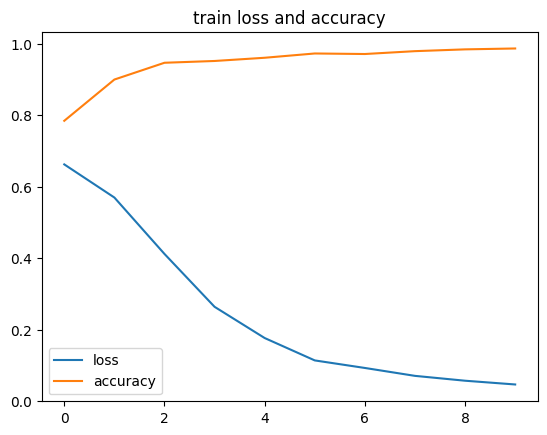

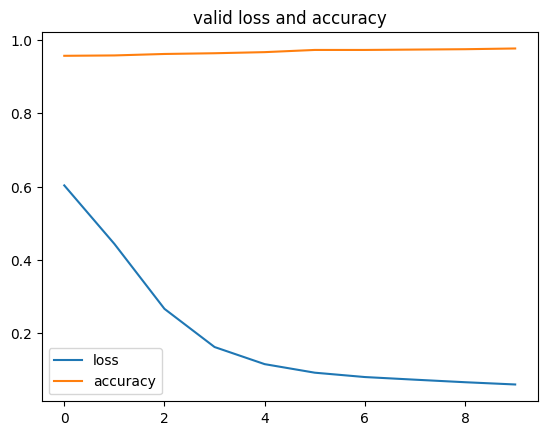

In [26]:
learning_rate = 0.00001
epochs = 10
#손실 함수 정의
#신경망에 sigmoid를 썼으므로 BCELoss() 사용
#만약 신경망에 softmax를 썼다면 CELoss() 사용
criterion = torch.nn.BCELoss().to(device)
#optimizer 정의
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#학습
fit(model, criterion, optimizer, epochs, train_loader, valid_loader)